In [3]:
import matplotlib.pyplot as plt
import os
from six.moves import cPickle as pickle
from scipy import signal
import numpy as np
import cv2
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
img_rows, img_cols = 32, 32

# Load 10,000 images from data_batch_1
data_dict = unpickle('./cifar_dataset/cifar-10-batches-py/data_batch_1')
data = data_dict[b'data']
data_dict = unpickle('./cifar_dataset/cifar-10-batches-py/data_batch_2')
data = np.concatenate((data, data_dict[b'data']))
data = data.reshape((-1,3,32,32)).transpose(0,2,3,1)
label = np.ones((20000,1)) * 2

#Convert image into grayscale
dummy = list()
for d in data:
    dummy.append(cv2.cvtColor(d, cv2.COLOR_BGR2GRAY)) 
    
data = np.array(dummy)

#cv2.imshow("temp",data[0])
#cv2.waitKey(0)
#label.shape


In [5]:
# Get data from Char74k dataset
pickle_file = 'complete_dataset.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    text_dataset = save['train_dataset'][:20000]
    del save
    print('Training set',text_dataset.shape)
    textLabel = np.ones((20000,1))
    print('Training label',textLabel.shape)
    



Training set (20000, 32, 32)
Training label (20000, 1)


In [6]:
# merge both datasets (text and non text)
dataset = np.concatenate((data,text_dataset))
label = np.concatenate((label,textLabel))

(40000, 32, 32) (40000, 1)


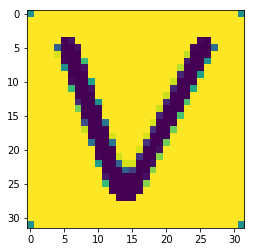

[1.]


In [14]:
#Shuffle
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation, :, :]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

dataset,label = randomize(dataset,label)
print(dataset.shape, label.shape)
plt.imshow(signal.medfilt(dataset[0]), interpolation='nearest')
plt.show() 
print(label[0])

In [15]:
#dataset = np.multiply(dataset, 1.0/255.0) 

pickle_file = os.path.join('.','dataset_text_detection.pickle')
#pickle_file = os.path.join(data_root,'complete_dataset1.pickle')
try:
    f = open(pickle_file, 'wb')
    save = {
        'dataset' : dataset,
        'label' : label
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e :
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [17]:
statinfo = os.stat(pickle_file)
print('Compresed pickle size: ', statinfo.st_size)

Compresed pickle size:  164160260
